<a href="https://colab.research.google.com/github/mona-jha/Computer_Vision/blob/main/auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images from 28x28 to 784-dimensional vectors
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))


In [9]:
# Accuracy calculation
def calculate_accuracy(y_true, y_pred, threshold=0.1):
    # If the absolute difference between true and predicted values is less than the threshold, it's "accurate"
    accurate_predictions = np.abs(y_true - y_pred) < threshold
    accuracy = np.mean(accurate_predictions)
    return accuracy

In [10]:
class Autoencoder:
    def __init__(self, input_size, hidden_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Input to hidden layer weights
        self.b1 = np.zeros((1, hidden_size))  # Hidden layer biases
        self.W2 = np.random.randn(hidden_size, input_size) * 0.01  # Hidden to output layer weights
        self.b2 = np.zeros((1, input_size))  # Output layer biases

    def forward(self, X):
        # Encode step (input -> hidden)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)

        # Decode step (hidden -> output)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)

        return self.a2

    def backward(self, X, y_true, learning_rate=0.01):
        # Compute the loss derivative w.r.t. output
        loss = y_true - self.a2
        d_output = loss * sigmoid_derivative(self.a2)

        # Compute the loss derivative w.r.t. hidden layer
        d_hidden_layer = np.dot(d_output, self.W2.T) * sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W2 += np.dot(self.a1.T, d_output) * learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.W1 += np.dot(X.T, d_hidden_layer) * learning_rate
        self.b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    def train(self, X_train, X_test, epochs=100, learning_rate=0.01, batch_size=256):
        self.train_loss_history = []
        self.train_accuracy_history = []
        self.test_loss_history = []
        self.test_accuracy_history = []

        for epoch in range(epochs):
            # Shuffle data and create mini-batches
            num_batches = X_train.shape[0] // batch_size
            for i in range(num_batches):
                batch_X = X_train[i * batch_size:(i + 1) * batch_size]
                batch_y = batch_X

                # Forward pass
                y_pred = self.forward(batch_X)

                # Backpropagation
                self.backward(batch_X, batch_y, learning_rate)

            # Compute the loss and accuracy for the training set
            y_train_pred = self.forward(X_train)
            train_loss = mse_loss(X_train, y_train_pred)
            train_accuracy = calculate_accuracy(X_train, y_train_pred)

            # Compute the loss and accuracy for the testing set
            y_test_pred = self.forward(X_test)
            test_loss = mse_loss(X_test, y_test_pred)
            test_accuracy = calculate_accuracy(X_test, y_test_pred)

            self.train_loss_history.append(train_loss)
            self.train_accuracy_history.append(train_accuracy)
            self.test_loss_history.append(test_loss)
            self.test_accuracy_history.append(test_accuracy)

            # Print loss and accuracy every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy * 100:.2f}%, "
                      f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%")

    def encode(self, X):
        # Return the encoded (compressed) data
        return sigmoid(np.dot(X, self.W1) + self.b1)

    def decode(self, encoded_data):
        # Decode the compressed data
        return sigmoid(np.dot(encoded_data, self.W2) + self.b2)

In [11]:
# Train the Autoencoder on MNIST
input_size = 28 * 28  # Each image has 28x28 pixels
hidden_size = 64  # Compressed representation

# Create the autoencoder model
autoencoder = Autoencoder(input_size, hidden_size)

# Train the autoencoder
autoencoder.train(X_train, X_test, epochs=100, learning_rate=0.01, batch_size=256)


Epoch 0, Train Loss: 0.032820969793910276, Train Accuracy: 76.32%, Test Loss: 0.03237134321540089, Test Accuracy: 76.41%
Epoch 10, Train Loss: 0.01640817697713278, Train Accuracy: 86.42%, Test Loss: 0.01624612775684626, Test Accuracy: 86.49%
Epoch 20, Train Loss: 0.015159370818933763, Train Accuracy: 87.01%, Test Loss: 0.015041017171462636, Test Accuracy: 87.10%
Epoch 30, Train Loss: 0.014893350614002905, Train Accuracy: 87.28%, Test Loss: 0.014793591980117914, Test Accuracy: 87.37%
Epoch 40, Train Loss: 0.016548941906972436, Train Accuracy: 86.95%, Test Loss: 0.016453664781003314, Test Accuracy: 87.02%
Epoch 50, Train Loss: 0.01751889755419731, Train Accuracy: 86.58%, Test Loss: 0.017411125690135146, Test Accuracy: 86.65%
Epoch 60, Train Loss: 0.015787959944195077, Train Accuracy: 87.08%, Test Loss: 0.01578400276369321, Test Accuracy: 87.12%
Epoch 70, Train Loss: 0.01295007922601187, Train Accuracy: 87.93%, Test Loss: 0.012897364051164144, Test Accuracy: 88.01%
Epoch 80, Train Loss: 0

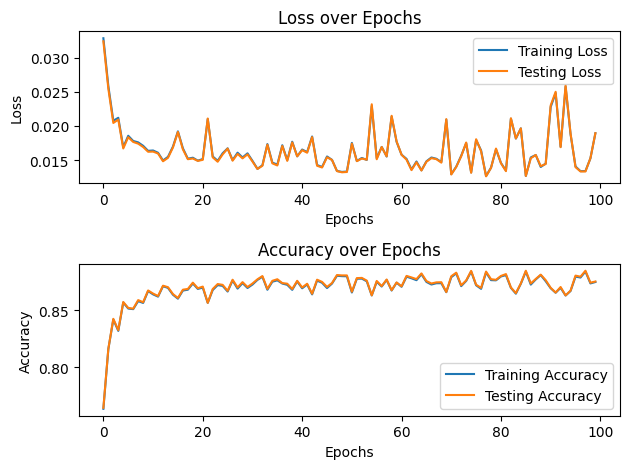

In [12]:
# Plot Training and Testing Loss
plt.subplot(2, 1, 1)
plt.plot(autoencoder.train_loss_history, label="Training Loss")
plt.plot(autoencoder.test_loss_history, label="Testing Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Training and Testing Accuracy
plt.subplot(2, 1, 2)
plt.plot(autoencoder.train_accuracy_history, label="Training Accuracy")
plt.plot(autoencoder.test_accuracy_history, label="Testing Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

Encoded Data Shape: (10000, 64)
Decoded Data Shape: (10000, 784)


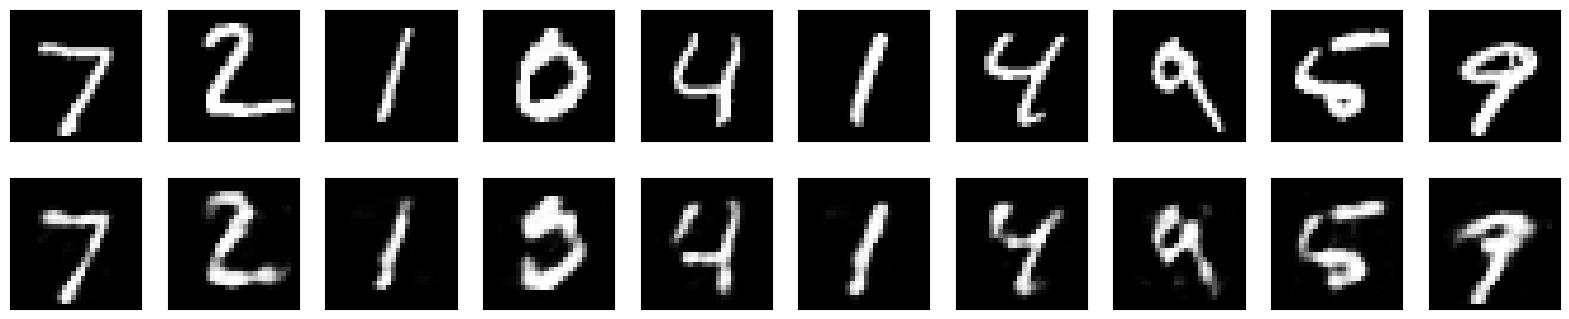

In [13]:
# Encode some test data (compress)
encoded_data = autoencoder.encode(X_test)
print("Encoded Data Shape:", encoded_data.shape)

# Decode (reconstruct) the test data
decoded_data = autoencoder.decode(encoded_data)
print("Decoded Data Shape:", decoded_data.shape)

# Reshape the decoded data back to the original image shape for visualization
decoded_images = decoded_data.reshape((-1, 28, 28))

# Display the original and decoded images
import matplotlib.pyplot as plt

n = 10  # Number of test images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i], cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
